<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web API and NLP

--- 
# Contents


---

### Contents:
Notebook 3
- [Part4](#Part4)
    - Importing library
    - Load csv file
    - NLP
        - tokenizer/lemmatizer and removing stop words
        - Basic EDA
        - CountVectorizer
        - Term Frequency-inverse Document Frequency(TF-IDF) Vectorizer

--- 
# Part 4  

NLP and EDA

---

## 4.1 Importing library

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import re

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

import collections
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline


from wordcloud import WordCloud, STOPWORDS

In [3]:
pd.set_option('display.max_columns', 4000)
pd.set_option('display.max_rows', 4000)

## 4.2 Load csv files

In [4]:
whiskey1 = pd.read_csv('../datasets/whiskey1.csv')
rum1 = pd.read_csv ('../datasets/rum1.csv')
whiskeyrum = pd.read_csv ('../datasets/whiskeyrum.csv')

whiskey1=whiskey1.astype(str)
rum1=rum1.astype(str)
whiskeyrum=whiskeyrum.astype(str)

In [5]:
print(whiskey1.columns)
print(rum1.columns)
print(whiskeyrum.columns)

Index(['title', 'selftext', 'origin', 'alltext'], dtype='object')
Index(['title', 'selftext', 'origin', 'alltext'], dtype='object')
Index(['title', 'selftext', 'origin', 'alltext'], dtype='object')


## 4.3 NLP

### 4.3.1 Tokenizer/Lemmatizer and removing stop words

In [6]:
def lem (df):
    
    
    #tokenize words
    tokenizer = RegexpTokenizer('[a-zA-Z]\w+')
    
    words = tokenizer.tokenize(df.lower())
    
    # Lemmatizer is used as stemming has a penchant for creating non-english words
    # Instantiate lemmatizer.
    lemmatizer = WordNetLemmatizer()
    
    # lemmatize words 
    lemmat = [lemmatizer.lemmatize(i) for i in words]
    
    # filtering stopwords, addn_words would be added trail and error based on later results
    addn_words=['']
    stops = stopwords.words('english')
    stops.extend(addn_words)
    
    #4. remove stop words
    useful_words = [w for w in words if not w in stops]
    
    #5. join words back, separated by a space 
    return (" ".join(useful_words))

In [7]:
#checking if definition is working
lem(whiskeyrum['alltext'][50])

'rare see sazerac msrp many bottles shelf six thinking go buy rare sazerac'

In [8]:
#Apply cleaning function on whiskey1, rum1 and whiskeyrum
whiskeyrum2 = whiskeyrum['alltext'].apply(lem)
whiskey2 = whiskey1['alltext'].apply(lem) 
rum2 = rum1['alltext'].apply(lem)

In [9]:
#checking
whiskey2

0       another pick liquor store next costco like fla...
1                                      hakushu distillery
2                                got nice smooth whiskies
3                                                        
4                                          old dusty find
                              ...                        
9757    booze budget buffalo trace kentucky straight b...
9758                                     drink save later
9759    thing better better bottle whiskey friend boug...
9760    maybe weakling lot trouble drinking whiskey lo...
9761                                     recent purchases
Name: alltext, Length: 9762, dtype: object

In [10]:
#checking for any null
print(whiskeyrum2.isnull().sum())
print(whiskey2.isnull().sum())
print(rum2.isnull().sum())

0
0
0


In [11]:
#putting them into a new seperate dataframe
whiskeyrum2 = pd.DataFrame(whiskeyrum2)
whiskey2 = pd.DataFrame(whiskey2)
rum2 = pd.DataFrame(rum2)

In [12]:
#checking
whiskeyrum2

,alltext
0,another pick liquor store next costco like fla...
1,help get started hey fairley new whiskey would...
2,alan jackson silverbelly canada modest respect...
3,whiskey club anyone ever whiskey club curious ...
4,one step jameson black barrel friend loves stu...
...,...
5690,looking rum cocktail wedding hi getting marrie...
5691,good mixers dark rums soda trying reduce soda ...
5692,good sipping rums come nip pint size looking i...
5693,recommendation something similar zaya hi guys ...


### 4.3.2 Basic EDA

The histogram and data analysis below depicts that majority of the posts are less than 2500 words. Mean number world count is 493 words with a standard deviation of 648 words.

                  0
count   5695.000000
mean     497.523793
std      699.807979
min       17.000000
25%      216.000000
50%      347.000000
75%      559.000000
max    19309.000000


C:\Users\Jing Cheng\AppData\Local\Temp\ipykernel_20220\386760177.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True)


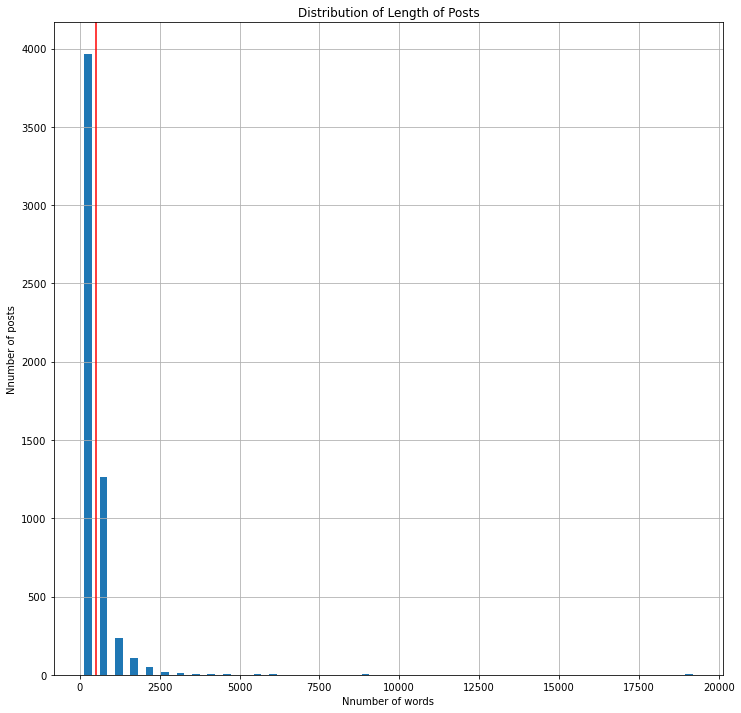

In [13]:
# Comparing length of posts
# red line represents the mean number of words per post -> 493 words

#determine the length of each post and append to list
length = [len(text) for text in whiskeyrum['alltext']]

length_df = pd.DataFrame(length)
print(length_df.describe())

fig, ax = plt.subplots(figsize=(12,12))
ax.hist(length, bins=40, rwidth=0.5)
plt.axvline(np.mean(length), color='red')
ax.set_title('Distribution of Length of Posts')
ax.set_xlabel('Nnumber of words')
ax.set_ylabel('Nnumber of posts')
ax.grid(b=True)

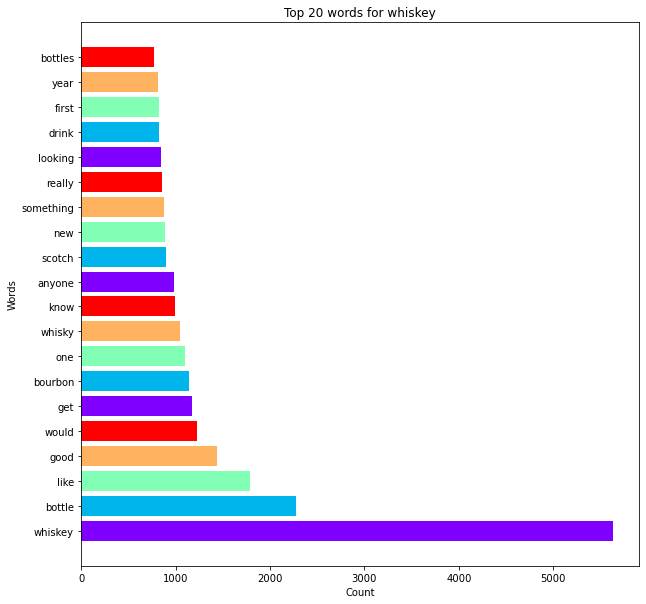

In [14]:
#Plot histograph; the top 20 most common words

#convert subreddit text to a single text
drunkwhiskey_text = " ".join(post for post in whiskey2['alltext'])
drunkrum_text = " ".join(post for post in rum2['alltext'])
drunkwhiskeyrum2_text= " ".join(post for post in whiskeyrum2['alltext'])


#histograph for whiskey
filtered_words1 = drunkwhiskey_text.split()
counted_words1 = collections.Counter(filtered_words1)

words1 = []
counts1 = []
for letter, count in counted_words1.most_common(20):
    words1.append(letter)
    counts1.append(count)
    
colors = cm.rainbow(np.linspace(0, 1, 5))
rcParams['figure.figsize'] = 10, 10

plt.title('Top 20 words for whiskey')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words1, counts1, color=colors);
plt.savefig('../figure/whiskey1word.png');

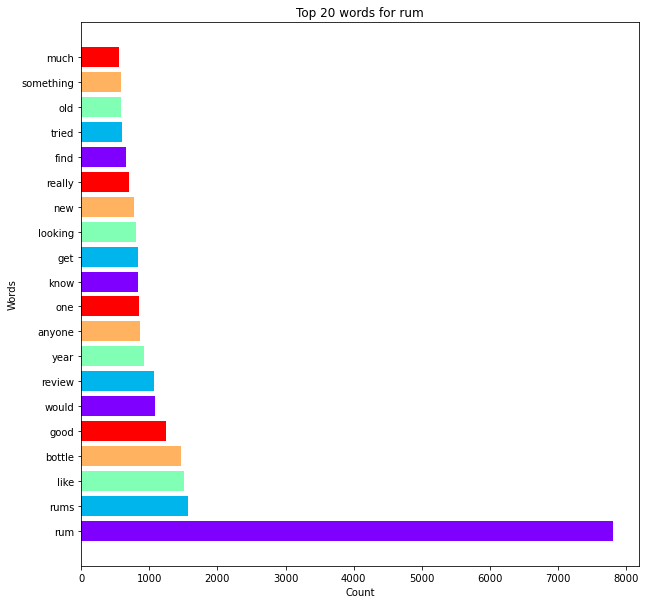

In [15]:
#histograph for rum
filtered_words2 = drunkrum_text.split()
counted_words2 = collections.Counter(filtered_words2)

words2 = []
counts2 = []
for letter, count in counted_words2.most_common(20):
    words2.append(letter)
    counts2.append(count)
    
colors = cm.rainbow(np.linspace(0, 1, 5))
rcParams['figure.figsize'] = 10, 10

plt.title('Top 20 words for rum')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words2, counts2, color=colors);
plt.savefig('../figure/rum1word.png');

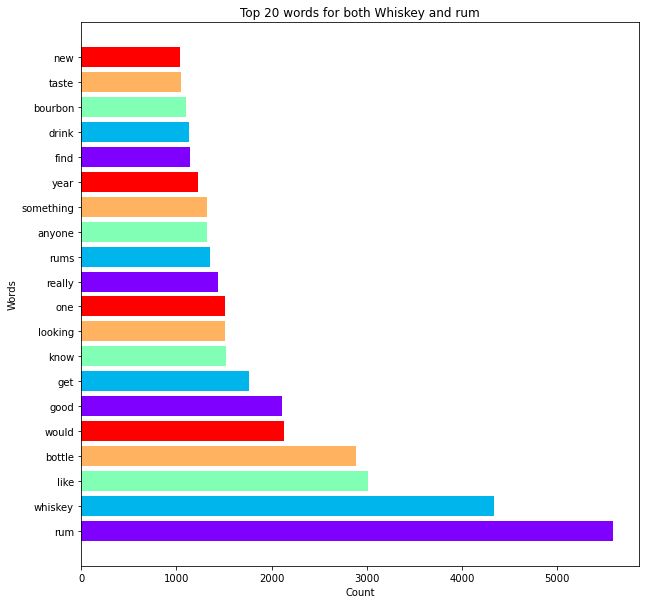

In [16]:
#histograph for both whiskey and rum
filtered_words3 = drunkwhiskeyrum2_text.split()
counted_words3 = collections.Counter(filtered_words3)

words3 = []
counts3 = []
for letter, count in counted_words3.most_common(20):
    words3.append(letter)
    counts3.append(count)
    
colors = cm.rainbow(np.linspace(0, 1, 5))
rcParams['figure.figsize'] = 10, 10

plt.title('Top 20 words for both Whiskey and rum')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words3, counts3, color=colors);
plt.savefig('../figure/whiskeyrum1word.png');

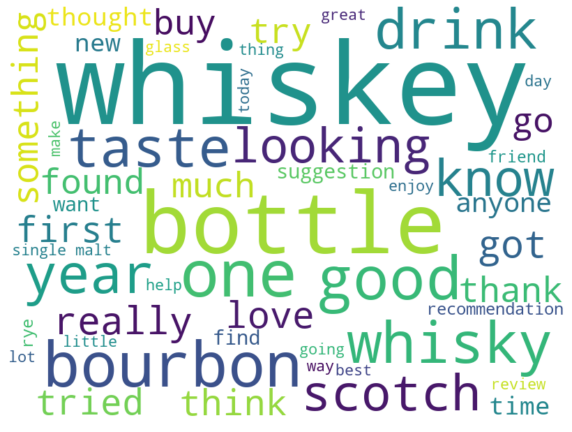

In [17]:
# generate a wordcloud for the respective subreddits

#masking for the 2 subreddits
#whiskey =1 
#rum=2 
drunkwhiskey = whiskeyrum[whiskeyrum['origin']==1]
drunkrum = whiskeyrum[whiskeyrum['origin']==2]

#plot word cloud for whiskey 
wc1 = WordCloud(max_words=50, width=800, height=600, 
              background_color='white', min_font_size =10).generate(drunkwhiskey_text)

plt.figure(figsize=(10,10))
plt.imshow(wc1,interpolation='bilinear')
plt.axis("off")
plt.savefig('../figure/whiskeywordcloud.png');

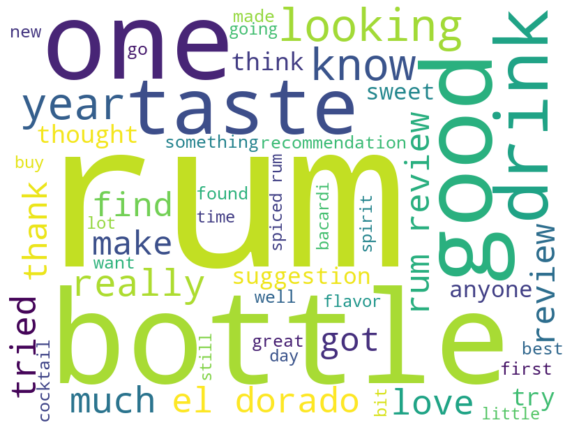

In [18]:
#plot word cloud for rum 
wc2 = WordCloud(max_words=50, width=800, height=600, 
              background_color='white', min_font_size =10).generate(drunkrum_text)

plt.figure(figsize=(10,10))
plt.imshow(wc2,interpolation='bilinear')
plt.axis("off")
plt.savefig('../figure/rumwordcloud.png');

### 4.3.3 CountVectorizer

In [19]:
#function to pair up words by twos

def count_vec_2 (dfnfeature):
    # Create an instance of CountVectorizer
    # NGRAMS = 2
    cvec2 = CountVectorizer(ngram_range=(2,2), max_features = 500)

    # X_counts stores the vectorized version of the data
    X_counts_2 = cvec2.fit_transform(dfnfeature)

    # converting the array into a dataframe and inputting the variable names
    X_counts_2_df = pd.DataFrame(X_counts_2.toarray())
    X_counts_2_df.columns = cvec2.get_feature_names()
    X_counts_2_df
    return X_counts_2_df

In [20]:
#wiskey texts top frequency 2 word phases without stop words
wcv2 = count_vec_2(whiskey2['alltext'])
wcv2.sum().sort_values(ascending=False).head(30).T

C:\Anaconda3\envs\dsi30\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


single malt         294
irish whiskey       231
jack daniels        210
buffalo trace       177
year old            170
single barrel       155
new whiskey         154
first time          154
anyone know         150
bottle whiskey      149
liquor store        136
japanese whiskey    135
would like          132
crown royal         127
johnnie walker      127
wild turkey         125
good whiskey        125
four roses          121
jim beam            114
paper towns         112
drinking whiskey    102
old fashioned       101
anyone tried        100
anyone else         100
maker mark           99
cask strength        97
price range          97
thanks advance       95
japanese whisky      93
small batch          87
dtype: int64

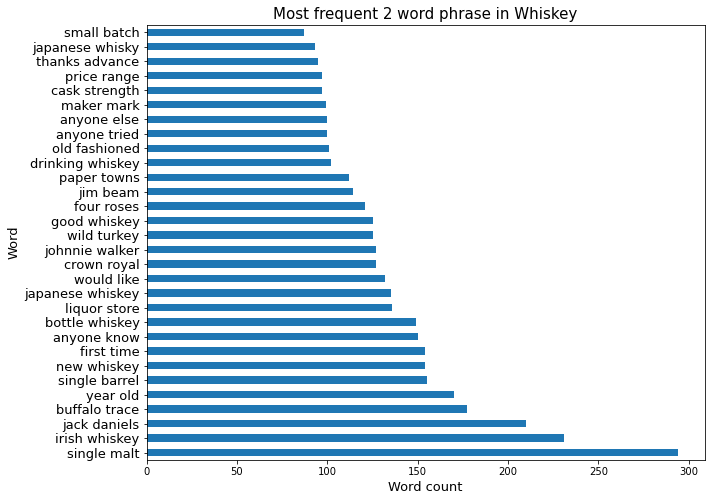

In [21]:
# Visualization
plt.figure(figsize=(10,8))
wcv2.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequent 2 word phrase in Whiskey', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);
plt.savefig('../figure/whiskey2word.png');

In [22]:
#rum texts top frequency 2 word phases without stop words
rcv2 = count_vec_2(rum2['alltext'])
rcv2.sum().sort_values(ascending=False).head(30).T

C:\Anaconda3\envs\dsi30\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


el dorado              424
rum review             311
spiced rum             245
mount gay              236
year old               207
captain morgan         200
havana club            197
new rum                170
white rum              162
appleton estate        156
anyone know            156
flor de                154
smith cross            151
review rum             135
dark rum               135
good rum               131
sipping rum            127
bottle rum             126
would like             123
de cana                115
rhum agricole          115
ron zacapa             113
anyone tried           112
pot still              112
liquor store           109
diplomatico reserva    106
thanks advance          90
reserva exclusiva       87
jamaican rum            86
live stream             85
dtype: int64

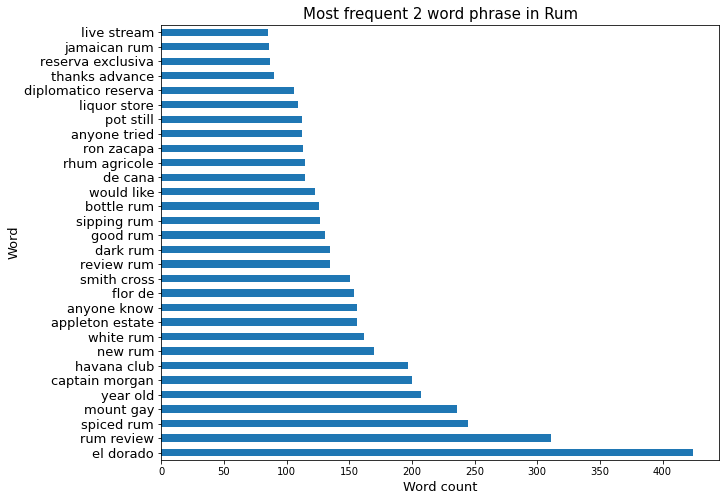

In [23]:
# Visualization
plt.figure(figsize=(10,8))
rcv2.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequent 2 word phrase in Rum', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);
plt.savefig('../figure/rum2word.png');

In [24]:
#both whiskey and rum texts top frequency 2 word phases without stop words
wrcv2 = count_vec_2(whiskeyrum2['alltext'])
wrcv2.sum().sort_values(ascending=False).head(30).T

C:\Anaconda3\envs\dsi30\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


el dorado            356
year old             254
would like           236
anyone know          209
spiced rum           208
single malt          204
mount gay            191
thanks advance       180
jack daniels         179
captain morgan       177
irish whiskey        169
liquor store         168
havana club          148
price range          144
single barrel        143
white rum            142
buffalo trace        138
flor de              132
smith cross          131
bottle whiskey       130
bought bottle        126
cask strength        126
anyone tried         125
new rum              125
looking something    122
appleton estate      120
really like          119
would love           119
dark rum             117
pot still            115
dtype: int64

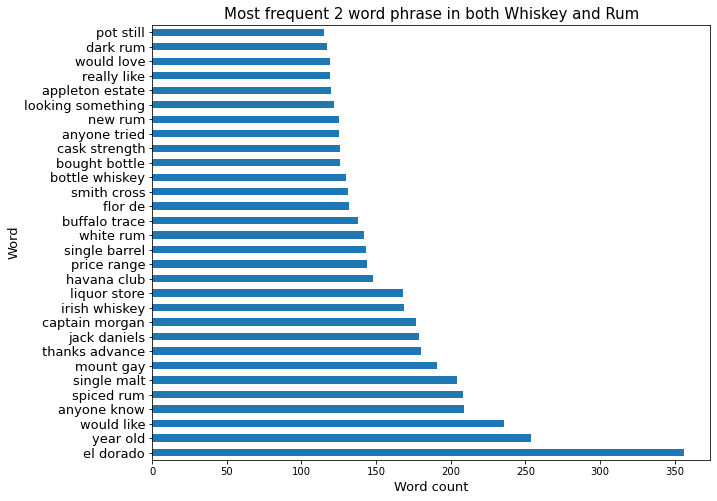

In [25]:
# Visualization
plt.figure(figsize=(10,8))
wrcv2.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequent 2 word phrase in both Whiskey and Rum', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);
plt.savefig('../figure/whiskeyrum2word.png');

In [26]:
#function to pair up words by threes

def count_vec_3 (dfnfeature):
    # Create an instance of CountVectorizer
    # NGRAMS = 3
    cvec3 = CountVectorizer(ngram_range=(3,3), max_features = 500)

    # X_counts stores the vectorized version of the data
    X_counts_3 = cvec3.fit_transform(dfnfeature)

    # converting the array into a dataframe and inputting the variable names
    X_counts_3_df = pd.DataFrame(X_counts_3.toarray())
    X_counts_3_df.columns = cvec3.get_feature_names()
    X_counts_3_df
    return X_counts_3_df

In [27]:
#whiskey 3 word phrase
wcv3 = count_vec_3(whiskey2['alltext'])
wcv3.sum().sort_values(ascending=False).head(30).T

C:\Anaconda3\envs\dsi30\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


single malt scotch           43
johnnie walker black         41
pappy van winkle             31
walker black label           29
local liquor store           25
jameson black barrel         24
nice bottle whiskey          24
single malt whiskey          23
roses single barrel          23
four roses single            22
paper towns online           21
try something new            21
kentucky straight bourbon    21
would greatly appreciated    21
first time trying            21
anyone know anything         20
know much whiskey            20
single malt whisky           19
watch southpaw online        19
fairly new whiskey           18
online paper towns           18
elijah craig barrel          17
paper towns paper            17
roses small batch            17
straight bourbon whiskey     17
johnnie walker blue          17
towns paper towns            17
four roses small             16
johnnie walker red           16
craig barrel proof           16
dtype: int64

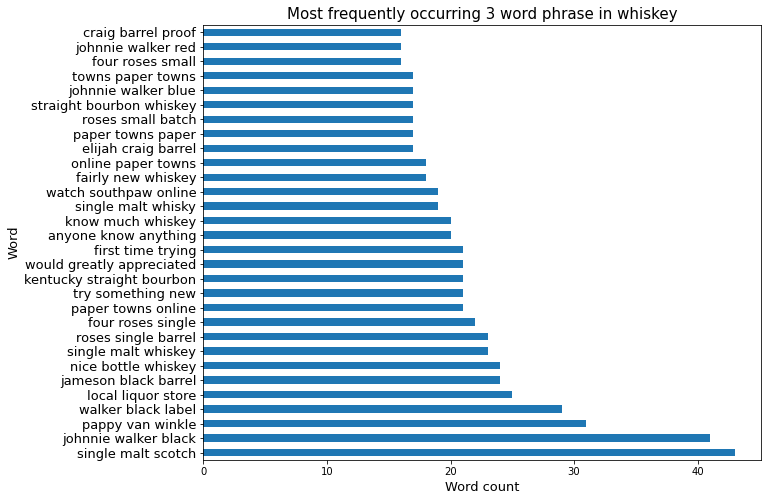

In [28]:
# Visualization
plt.figure(figsize=(10,8))
wcv3.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring 3 word phrase in whiskey', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);
plt.savefig('../figure/whiskey3word.png');

In [29]:
#rum 3 word phrase
rcv3 = count_vec_3(rum2['alltext'])
rcv3.sum().sort_values(ascending=False).head(30).T

C:\Anaconda3\envs\dsi30\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


flor de cana                     112
el dorado year                    79
mount gay xo                      74
diplomatico reserva exclusiva     73
rum review spirits                57
flor de caña                      41
gay black barrel                  39
mount gay black                   38
watch jurassic world              36
jurassic world online             33
appleton estate year              31
rum old fashioned                 31
year old rum                      30
mount gay eclipse                 30
santiago de cuba                  27
ron zacapa xo                     27
dorado year old                   27
pours liked little                27
live stream ncaa                  27
local liquor store                25
stream ncaa football              22
plantation xo th                  21
havana club year                  20
de cana year                      20
national rum day                  20
plantation original dark          18
appleton estate signature         18
p

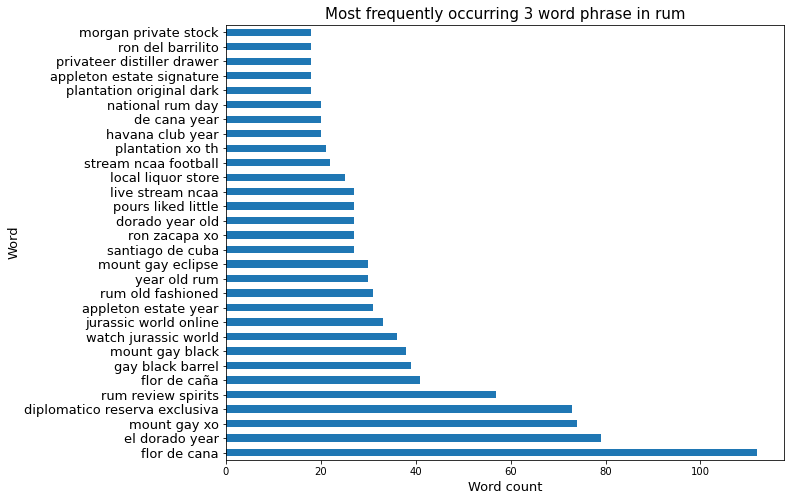

In [30]:
# Visualization
plt.figure(figsize=(10,8))
rcv3.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring 3 word phrase in rum', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);
plt.savefig('../figure/rum3word.png');

In [31]:
#rum 3 word phrase
wrcv3 = count_vec_3(whiskeyrum2['alltext'])
wrcv3.sum().sort_values(ascending=False).head(30).T

C:\Anaconda3\envs\dsi30\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


flor de cana                     98
mount gay xo                     65
diplomatico reserva exclusiva    62
el dorado year                   62
watch jurassic world             36
would greatly appreciated        34
gay black barrel                 34
flor de caña                     33
johnnie walker black             33
mount gay black                  33
jurassic world online            33
try something new                32
single malt scotch               32
local liquor store               30
pours liked little               27
heard good things                26
mount gay eclipse                26
full movie online                24
walker black label               24
nice bottle whiskey              24
appleton estate year             23
would like get                   23
anyone know good                 23
please let know                  22
roses single barrel              22
rum old fashioned                22
pappy van winkle                 22
four roses single           

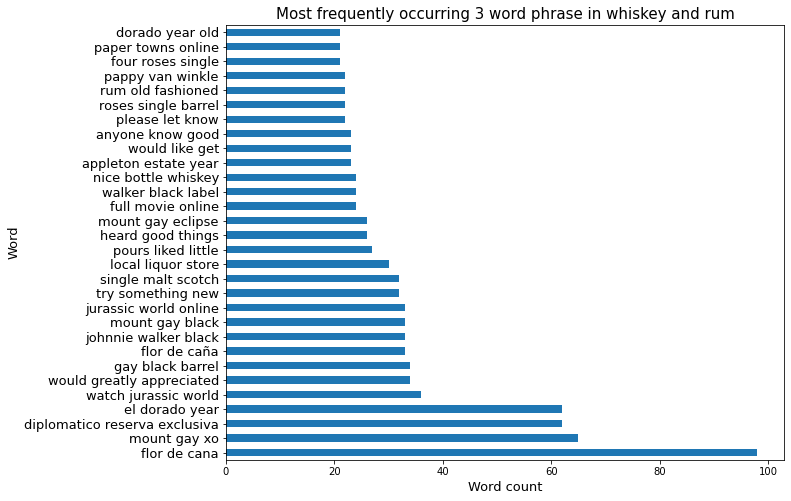

In [32]:
# Visualization
plt.figure(figsize=(10,8))
wrcv3.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring 3 word phrase in whiskey and rum', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);
plt.savefig('../figure/whiskeyrum3word.png');

### 4.3.4 Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer

In [33]:
def tfidfv (dfnfeature):
    
    # Create an instance of TFID Vectorizer
    tfidf_vect = TfidfVectorizer(max_features = 500)

    # X_tfidf stores the vectorized version of the data
    X_tfidf = tfidf_vect.fit_transform(dfnfeature)

    # converting the array into a dataframe and inputting the variable names
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = tfidf_vect.get_feature_names()
    X_tfidf_df
    return X_tfidf_df

In [34]:
#TF-IDF for Whiskey, rum and both

wtf = tfidfv(whiskey2['alltext'])
rtf = tfidfv(rum2['alltext'])
wrtf  = tfidfv(whiskeyrum2['alltext'])

C:\Anaconda3\envs\dsi30\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Anaconda3\envs\dsi30\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Anaconda3\envs\dsi30\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
# rankwords by frequency
wtf.sum().sort_values(ascending=False).head(15)

whiskey       772.353399
bottle        341.549610
good          254.929234
whisky        236.272536
like          221.025982
bourbon       214.033246
anyone        210.845461
new           207.519805
collection    199.121177
one           192.237455
first         185.422873
got           178.892243
old           177.143021
know          167.614776
get           165.942423
dtype: float64

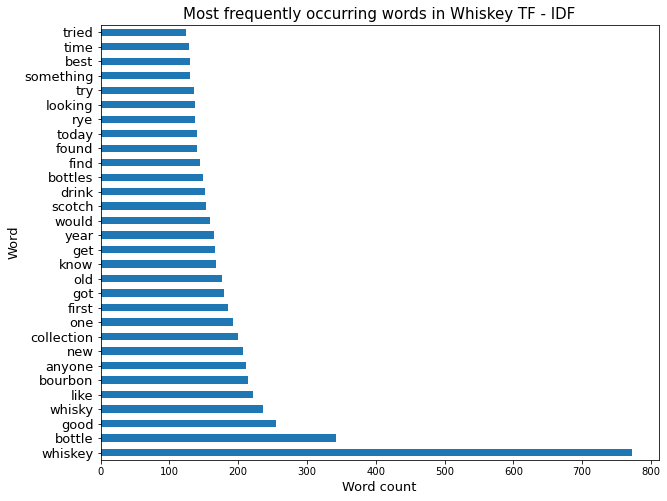

In [36]:
# Visualilzation
plt.figure(figsize=(10,8))
wtf.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Whiskey TF - IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);
plt.savefig('../figure/whiskey1wordTF.png');

In [37]:
rtf.sum().sort_values(ascending=False).head(15)

rum           903.173668
review        415.129078
rums          216.256246
bottle        207.104755
good          188.279808
new           179.753547
anyone        175.654477
year          174.370968
like          154.459744
old           132.701793
would         130.307164
know          128.897916
collection    128.051136
one           125.422255
foursquare    118.982832
dtype: float64

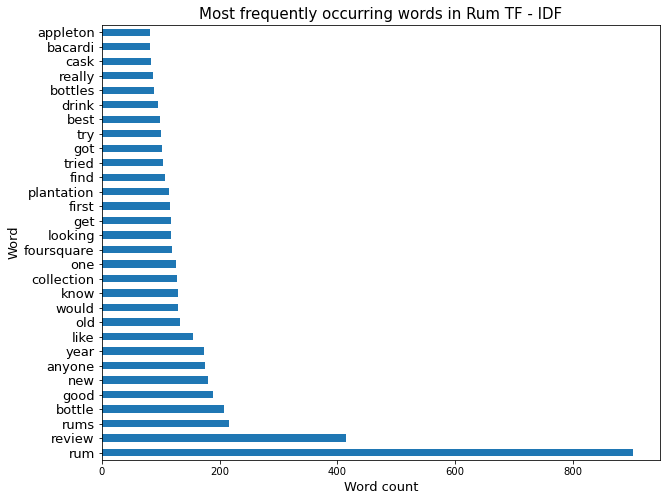

In [38]:
# Visualilzation
plt.figure(figsize=(10,8))
rtf.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Rum TF - IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);
plt.savefig('../figure/rum1wordTF.png');

In [39]:
wrtf.sum().sort_values(ascending=False).head(15)

rum          455.104637
whiskey      399.078745
bottle       262.528596
like         236.816156
good         212.777301
would        203.350670
anyone       187.023450
looking      176.317577
get          175.076624
know         170.371320
rums         153.881490
one          150.074438
really       143.388670
something    143.153092
find         141.196210
dtype: float64

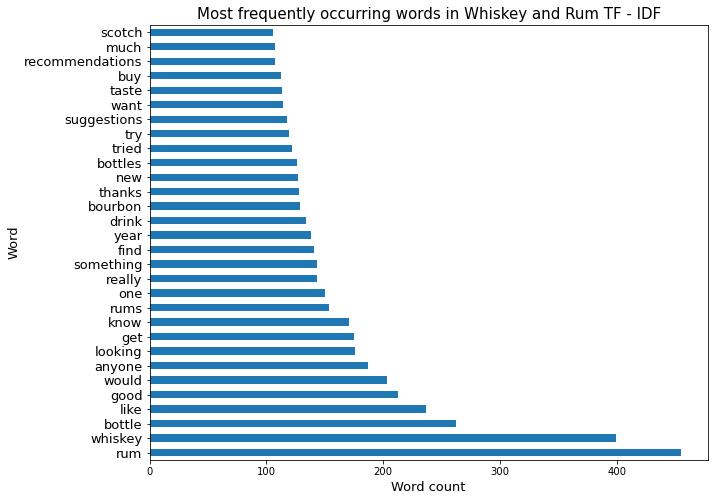

In [40]:
# Visualilzation
plt.figure(figsize=(10,8))
wrtf.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Whiskey and Rum TF - IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);
plt.savefig('../figure/whiskeyrum1wordTF.png');

In [41]:
#TF IDF for 2 word phase

def tfidfv2 (dfnfeature):
    
    # Create an instance of TFID Vectorizer
    tfidf_vect2 = TfidfVectorizer(ngram_range=(2,2),max_features = 500)

    # X_tfidf stores the vectorized version of the data
    X_tfidf2 = tfidf_vect2.fit_transform(dfnfeature)

    # converting the array into a dataframe and inputting the variable names
    X_tfidf_df2 = pd.DataFrame(X_tfidf2.toarray())
    X_tfidf_df2.columns = tfidf_vect2.get_feature_names()
    X_tfidf_df2
    return X_tfidf_df2

In [42]:
#TF-IDF for Whiskey, rum and both

wtf2 = tfidfv2(whiskey2['alltext'])
rtf2 = tfidfv2(rum2['alltext'])
wrtf2  = tfidfv2(whiskeyrum2['alltext'])

C:\Anaconda3\envs\dsi30\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Anaconda3\envs\dsi30\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Anaconda3\envs\dsi30\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
wtf2.sum().sort_values(ascending=False).head(15)

single malt         123.310287
irish whiskey        97.702271
jack daniels         84.648938
anyone know          84.219692
first time           83.534536
buffalo trace        79.697942
year old             75.019937
liquor store         74.313597
new whiskey          67.951737
anyone tried         67.700803
single barrel        64.173868
japanese whiskey     62.401688
good whiskey         58.575229
bottle whiskey       58.478894
anyone else          58.002000
dtype: float64

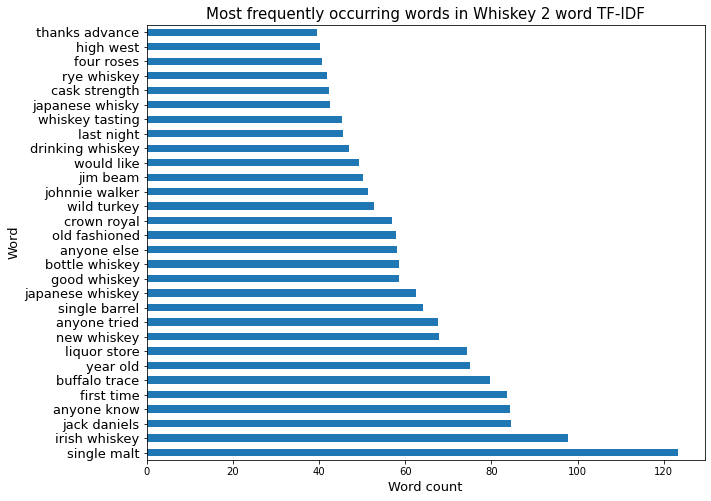

In [44]:
# Visualilzation
plt.figure(figsize=(10,8))
wtf2.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Whiskey 2 word TF-IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);
plt.savefig('../figure/whiskey2wordTF.png');

In [45]:
rtf2.sum().sort_values(ascending=False).head(15)

rum review        183.441950
el dorado         124.136798
review rum        101.760200
spiced rum         94.064521
anyone know        81.218788
havana club        80.839092
mount gay          77.756956
new rum            72.806286
year old           71.785990
captain morgan     68.879986
anyone tried       68.514250
smith cross        60.577925
white rum          59.940460
good rum           59.023744
rum collection     56.497802
dtype: float64

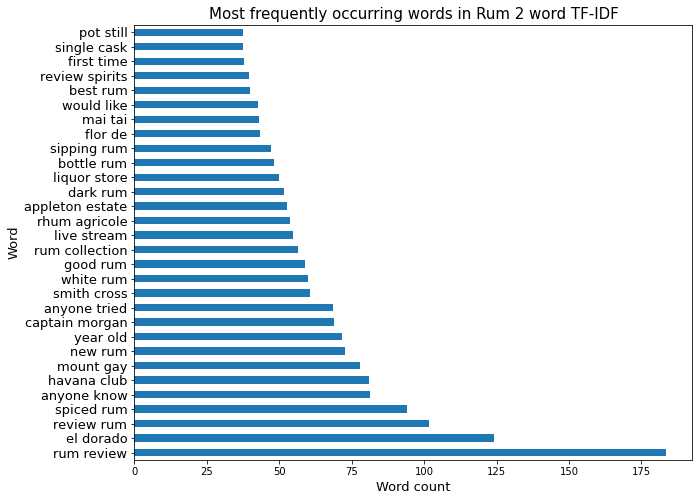

In [46]:
# Visualilzation
plt.figure(figsize=(10,8))
rtf2.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Rum 2 word TF-IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);
plt.savefig('../figure/rum2wordTF.png');

In [47]:
wrtf2.sum().sort_values(ascending=False).head(15)

anyone know       102.470207
el dorado          86.185634
would like         77.748583
year old           70.724842
thanks advance     70.656546
spiced rum         69.756406
anyone tried       65.171815
liquor store       64.537304
jack daniels       62.632302
single malt        60.967461
captain morgan     57.397581
irish whiskey      53.414722
mount gay          51.582085
anyone else        50.748010
bottle whiskey     50.589444
dtype: float64

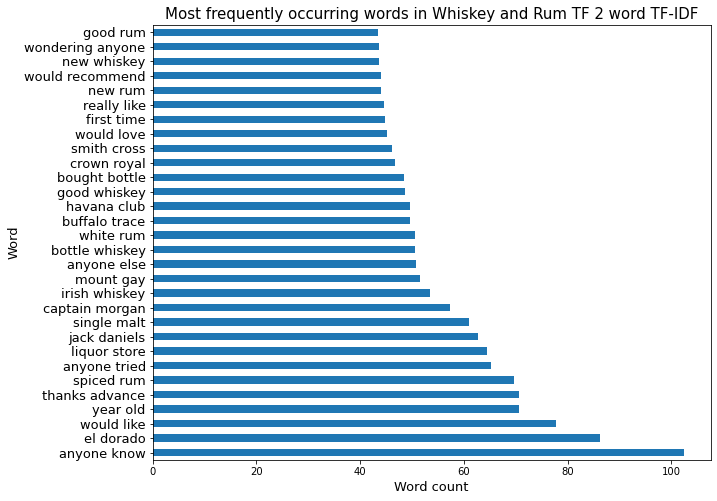

In [48]:
# Visualilzation
plt.figure(figsize=(10,8))
wrtf2.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Whiskey and Rum TF 2 word TF-IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);
plt.savefig('../figure/whiskeyrum2wordTF.png');

In [49]:
#TF IDF for 3 word phase

def tfidfv3 (dfnfeature):
    
    # Create an instance of TFID Vectorizer
    tfidf_vect3 = TfidfVectorizer(ngram_range=(3,3),max_features = 500)

    # X_tfidf stores the vectorized version of the data
    X_tfidf3 = tfidf_vect3.fit_transform(dfnfeature)

    # converting the array into a dataframe and inputting the variable names
    X_tfidf_df3 = pd.DataFrame(X_tfidf3.toarray())
    X_tfidf_df3.columns = tfidf_vect3.get_feature_names()
    X_tfidf_df3
    return X_tfidf_df3

In [50]:
#TF-IDF for Whiskey, rum and both

wtf3 = tfidfv3(whiskey2['alltext'])
rtf3 = tfidfv3(rum2['alltext'])
wrtf3  = tfidfv3(whiskeyrum2['alltext'])

C:\Anaconda3\envs\dsi30\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Anaconda3\envs\dsi30\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Anaconda3\envs\dsi30\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
wtf3.sum().sort_values(ascending=False).head(15)

single malt scotch           28.245727
johnnie walker black         23.379147
first time trying            20.247874
local liquor store           19.753310
pappy van winkle             17.865953
anyone know anything         16.882769
single malt whiskey          16.577659
walker black label           15.688914
nice bottle whiskey          15.677218
would greatly appreciated    15.426955
anyone know good             14.521250
single malt whisky           14.499200
jameson black barrel         14.173985
know much whiskey            13.436563
fairly new whiskey           13.166257
dtype: float64

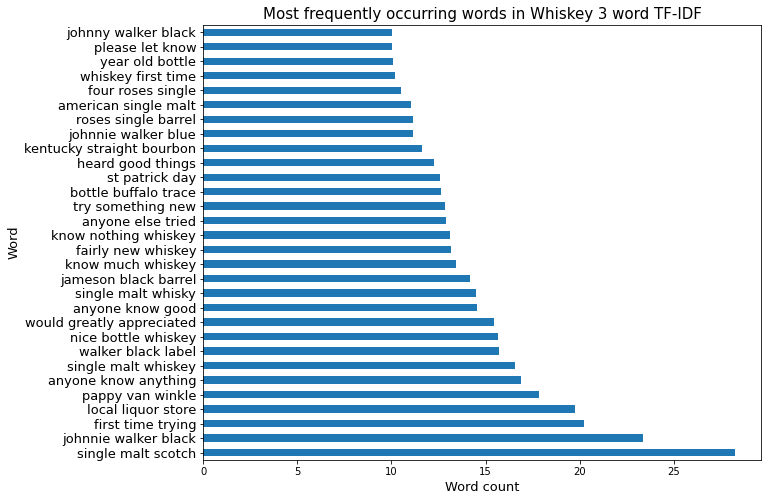

In [52]:
# Visualilzation
plt.figure(figsize=(10,8))
wtf3.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Whiskey 3 word TF-IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);
plt.savefig('../figure/whiskey3wordTF.png');

In [53]:
rtf3.sum().sort_values(ascending=False).head(15)

flor de cana                     55.535736
rum review spirits               48.393592
mount gay xo                     39.621338
diplomatico reserva exclusiva    36.777044
el dorado year                   34.667765
flor de caña                     23.375026
local liquor store               20.897005
rum old fashioned                20.476705
national rum day                 18.566613
review rums day                  18.000000
mount gay eclipse                17.517944
year old rum                     17.170635
gay black barrel                 15.052570
anyone know anything             14.861140
appleton estate year             14.593610
dtype: float64

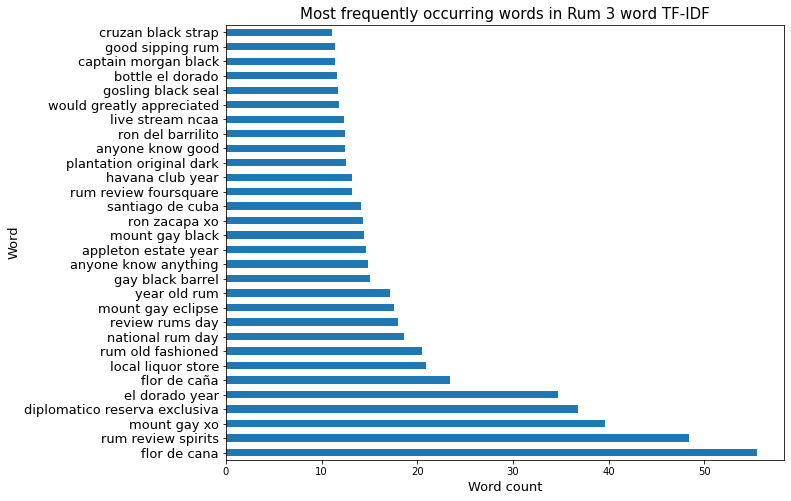

In [54]:
# Visualilzation
plt.figure(figsize=(10,8))
rtf3.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Rum 3 word TF-IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);
plt.savefig('../figure/rum3wordTF.png');

In [55]:
wrtf3.sum().sort_values(ascending=False).head(15)

flor de cana                     45.029812
mount gay xo                     32.532970
diplomatico reserva exclusiva    31.437326
el dorado year                   25.331099
local liquor store               23.537932
would greatly appreciated        22.730774
single malt scotch               22.620895
johnnie walker black             20.658199
anyone know good                 20.259629
heard good things                19.779546
flor de caña                     18.438657
try something new                18.408404
please let know                  18.315273
would like know                  17.133199
would like get                   17.102571
dtype: float64

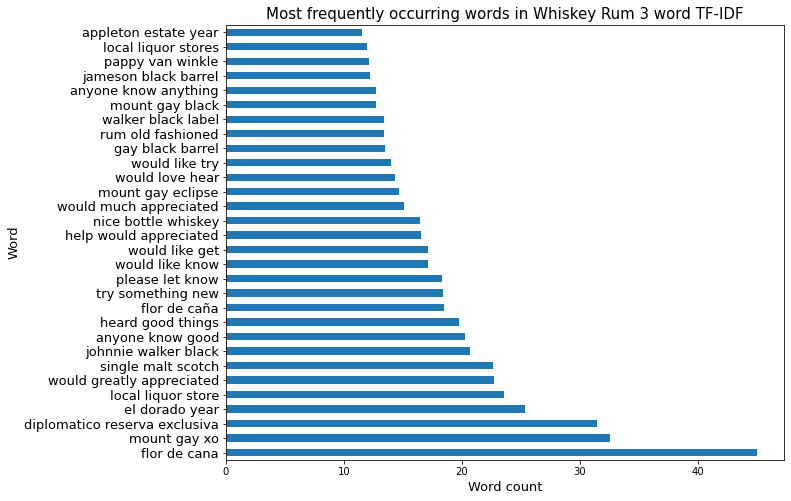

In [56]:
# Visualilzation
plt.figure(figsize=(10,8))
wrtf3.sum().sort_values(ascending=False).head(30)[0:].plot(kind='barh');
plt.title('Most frequently occurring words in Whiskey Rum 3 word TF-IDF', size = 15);
plt.xlabel('Word count', size =13);
plt.yticks(size=13);
plt.ylabel('Word', size=13);
plt.savefig('../figure/whiskeyrum3wordTF.png');

In [57]:
whiskeyrum2['origin'] = whiskeyrum['origin']

In [58]:
#saving to csv, This version of dataframe only consist of index and the text
whiskey2.to_csv('../datasets/whiskey2.csv', index=False)
rum2.to_csv('../datasets/rum2.csv', index=False)
whiskeyrum2.to_csv('../datasets/whiskeyrum2.csv', index=False)